# Datos.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# Deep Learning

# Conversion de escala de Temperatura

## Descripcion

En el mundo hay 4 formas de medir la temperatura:

1. Escala Fahrenheit (EEUU): el agua se congela a 32° y hierve a las 212°
2. Escala Celsius (No EEUU): el agua se congela a 0° y hierve a las 100°
3. Escala De Kelvin (cientifico): el agua se congela a 273.15 k y hierve a las 373.15 k
4. Escala De Rankine (obsoleto): el agua se congela a 0° y hierve a las 671.67°

Lo Mas comun es, para estos casos, crear un programa clasico que contenga una funcion que permita transformar un valor de una escala de temperatura a otra.

Sin embargo, crearemos una IA que me permita convertir estos datos sin que previamente le digamos que calculos deberia de hacer (reglas) y/o que metodo deberia utilizar para predecir (logica)

## Conversion Programacion Regular

En estos casos es normal que el programador cree:

1. Las reglas
2. La logica de como se aplican estas reglas

Para convertir de Celcius a Fahrenheit:

    Valor_Fahrenheit = (Valor_celcius × 9/5) + 32

Para convertir de Celcius a Kelvin:

    Valor_Kelvin = Valor_celcius + 273.15

Para convertir Fahrenheit a Celcius:

    Valor_Celcius = (Valor_Fahrenheit − 32) × 5/9

Para convertir Fahrenheit a Kelvin:

    Valor_Kelvin = (Valor_Fahrenheit − 32) × 5/9 + 273.15

Para convertir Kelvin a Celcius:

    Valor_Celcius = Valor_Kelvin − 273.15

Para convertir Kelvin a Fahrenheit:

    Valor_Fahrenheit = (Valor_Kelvin − 273.15) × 9/5 + 32




### Funcion Celcius-Fahrenheit

In [84]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_celsius):
  fah= p_celsius*1.8 + 32
  return fah

print('50° Celsius = ',      f_conv_cels_fah(50),      '° Fahrenheit ')

50° Celsius =  122.0 ° Fahrenheit 


### Funcion Celcius-Kelvin

In [85]:
#creamos una funcion para convertir
def f_conv_cels_kel (p_celsius):
  kel = p_celsius + 273.15
  return kel

print('50° Celsius = ',      f_conv_cels_kel(50),      '° Kelvin ')

50° Celsius =  323.15 ° Kelvin 


### Funcion Fahrenheit-celcius

In [86]:
#creamos una funcion para convertir
def f_conv_fah_cels (p_fahrenheit):
  #Valor_Celcius = (Valor_Fahrenheit − 32) × 5/9
  cels = (p_fahrenheit - 32)*(5/9)
  return cels

print('122.0° Fahrenheit = ',      f_conv_fah_cels(122.0),      '° Celcius ')

122.0° Fahrenheit =  50.0 ° Celcius 


### Funcion Fahrenheit-kelvin

In [87]:
#creamos una funcion para convertirs
def f_conv_fah_kel (p_fahrenheit):
  #(Valor_Fahrenheit − 32) × 5/9 + 273.15
  cels = (p_fahrenheit - 32)*(5/9)+(273.15)
  return cels

print('122.0° Fahrenheit = ',      f_conv_fah_kel(122.0),      '° Kelvin ')

122.0° Fahrenheit =  323.15 ° Kelvin 


### Funcion Kelvin-celcius

In [88]:
# Valor_Celcius = Valor_Kelvin − 273.15

def f_conv_kel_cels (p_kelvin):
  kel = (p_kelvin - 273.15)
  return kel

print('323.15° Kelvin = ', f_conv_kel_cels(323.15), '° Kelvin')

323.15° Kelvin =  50.0 ° Kelvin


### Funcion kelvin-Fahrenheit

In [89]:
# Valor_Fahrenheit = (Valor_Kelvin − 273.15) × 9/5 + 32

def f_conv_kel_fah (p_kelvin):
  kel = (p_kelvin - 273.15)*(9/5)+(32)
  return kel

print('323.15° Kelvin = ', f_conv_kel_cels(323.15), '° Fahrenheit')

323.15° Kelvin =  50.0 ° Fahrenheit


La base de datos de temperatura tiene como datos en la columna de grado_celcius valores entre -100000 a 100000 , estos datos estan ordenados y sus columnas contiguas son las tranformaciones directas de los valores de la primera columna.

El Dataset se puede encontrar en el siguiente link:

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T13/grados_temperatura_celcius_fahrenheit_kelvin.csv

El Dataset en formato raw se encuentra en el siguiente enlace:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T13/grados_temperatura_celcius_fahrenheit_kelvin.csv

## Conversion Mediante IA

1. Una red con una capa de entrada y una de salida
2. Para que entrene le pasamos los grados celsius y su conversión fahrenheit
3. La red neuronal aprendera por si sola las reglas y la logíca con todas sus variaciones (pesos y sesgos).

  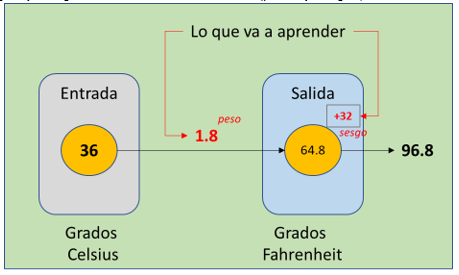

## Importando Librerias

In [90]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Importando DataSet desde GitHub

Debemos recordar que antes de importar el dataset, los datos numericos decimales que vamos a trabajar, preferiblemente ya deben estar dispuestos con "." y no con ",". Tambien el link que vamos a trabajar debe ser su correspondiente en formato RAW.

In [91]:
df = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T13/grados_temperatura_celcius_fahrenheit_kelvin.csv")
df.head(3)

,grado_celcius,grado_fahrenheit,grado_kelvin
0,-100000,-179968,-99726.85
1,-99995,-179959,-99721.85
2,-99990,-179950,-99716.85


## Informacion del DataSet

In [92]:
df.describe()

,grado_celcius,grado_fahrenheit,grado_kelvin
count,40001.000000,40001.00000,40001.000000
mean,0.000000,32.00000,273.150000
std,57737.191978,103926.94556,57737.191978
min,-100000.000000,-179968.00000,-99726.850000
25%,-50000.000000,-89968.00000,-49726.850000
50%,0.000000,32.00000,273.150000
75%,50000.000000,90032.00000,50273.150000
max,100000.000000,180032.00000,100273.150000


In [93]:
df.isnull().sum()

grado_celcius       0
grado_fahrenheit    0
grado_kelvin        0
dtype: int64

In [94]:
df.shape

(40001, 3)

In [95]:
df.dtypes

grado_celcius         int64
grado_fahrenheit      int64
grado_kelvin        float64
dtype: object

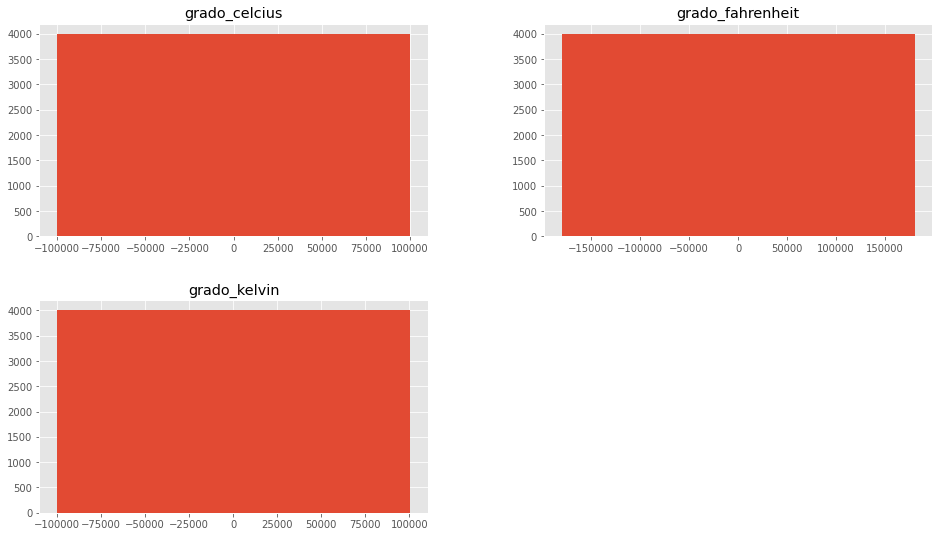

In [96]:
df.hist() 
plt.show()

Debido a que realmente es una escala de valores entre que va desde **[-100000 a 100000]**, su representacion es una escala uniforme de datos, por tanto no tiene mucho sentido hallar el grafico del histograma de los datos.

Del mismo modo como veremos a continuacion, no hay valor real en realizar el grafico de correlaciones de los datos, pues su relacion esta en que son valores dados entre un **RANGO ORDENADO** de valores, por este motivo bastaria con una **REGRESION LINEAL** para poder predecir cualquier cambio de valores (Proceso de Machine Learning Clasico) o incluso una funcion propia de predicion de datos. 

Sin embargo la gracia de este ejercicio no es la de utilizar funciones ni la de decirle previamente a la IA que metodo de solucion de prediccion debe utilizar, si no de observar que hace la computadora para averiguar por si sola que calculos existen entre un dato de una columna y otro, mientra que a la vez averigua que metodo es el mas preciso para poder predeccion con un buen grado de exactitud algun valor que nosotros le ingresemos mas adelante.

In [97]:
print(df.keys())

Index(['grado_celcius', 'grado_fahrenheit', 'grado_kelvin'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


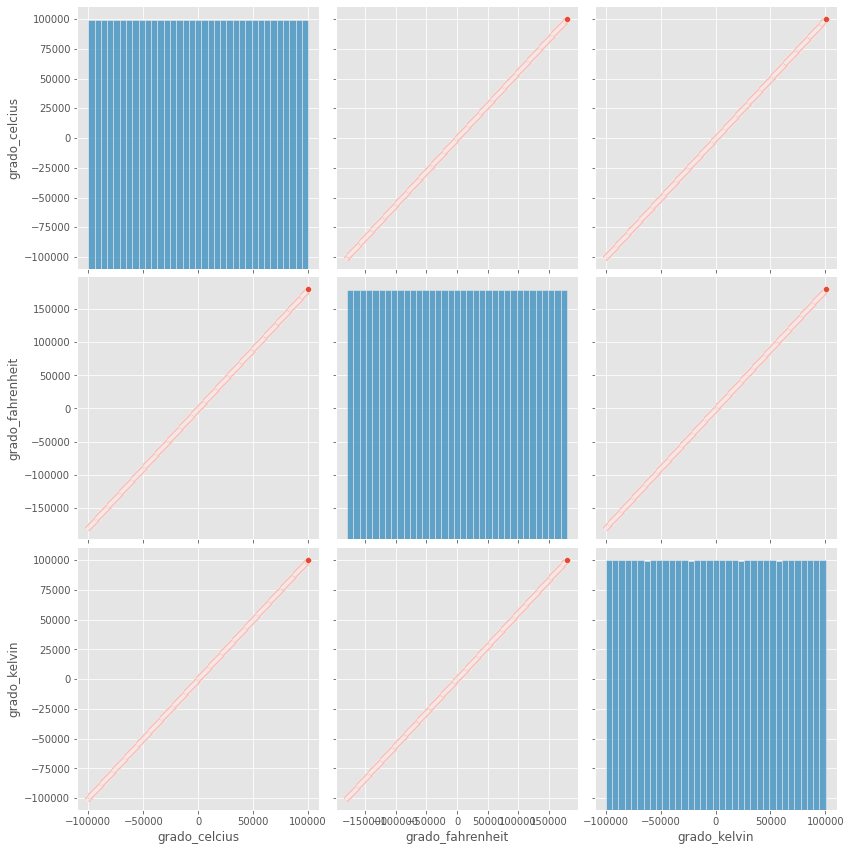

In [98]:
sbn.pairplot(df,size=4,vars=['grado_celcius', 'grado_fahrenheit', 'grado_kelvin'],kind='scatter')

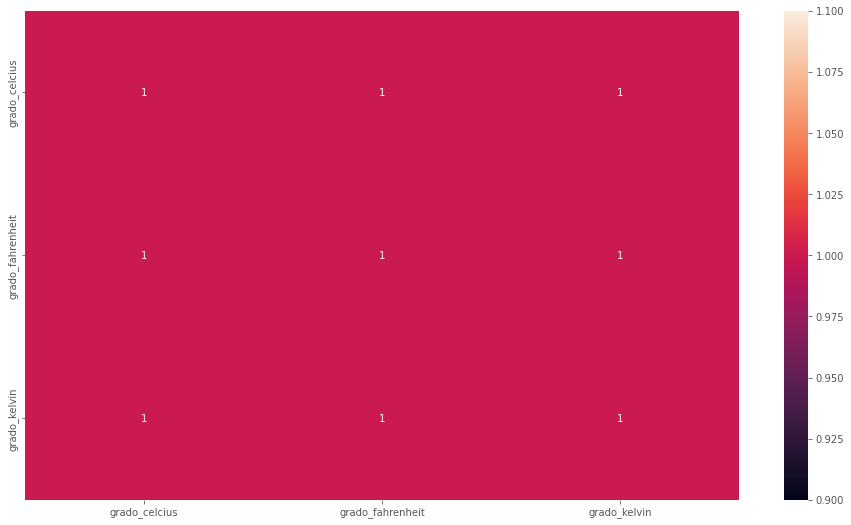

In [99]:
correlation_matrix = df.corr().round(2)
sbn.heatmap(data=correlation_matrix,annot=True)

## Definiendo parametros de entrada y Salida

In [100]:
df.columns

Index(['grado_celcius', 'grado_fahrenheit', 'grado_kelvin'], dtype='object')

In [101]:
celsius = np.array(df['grado_celcius'])
print(str(celcius))

[-100000  -99995  -99990 ...   99990   99995  100000]


In [102]:
celsius.dtype

dtype('int64')

In [103]:
fahrenheit = np.array(df['grado_fahrenheit'])
print(str(fahrenheit))

[-179968 -179959 -179950 ...  180014  180023  180032]


In [104]:
fahrenheit.dtype

dtype('int64')

In [105]:
kelvin = np.array(df['grado_kelvin'])
print(str(kelvin))

[-99726.85 -99721.85 -99716.85 ... 100263.15 100268.15 100273.15]


In [106]:
kelvin.dtype

dtype('float64')

Lo importante de esta parte del proceso es identificar que tupla vamos a utilizar como datos o parametros de entrada y cuales como datos o parametros de salida. Estos parametros se utilizaran como las capas correspondientes en una red neuronal, ya en este momento seria una capa con parametros de entrada y otra capa con parametros de salida, independientemente de las capas intermedias que podemos llegar a utilizar.

Algo que debemos tener en cuenta al momento de trabajar con tuplas de datos, cuando estas sean muy pequeñas, es que estas aplicaran un sesgo a la inteligencia artificial, mientras mas pocos datos se tenga mayor sera el sesgo de informacion que tengamos. Lo otro es que el nivel de precicion con nlas predicciones que le pidamos a esta IA o sus resultados, estara relacionado con los numeros de decimales que tengan los datos, tener pocos decimales tambien añade un sesgo frente a los resultados y empobrece el rango de aprendizaje de la IA.

## RED Celcius to Fahrenheit

### Creando Red Neuronal

1. Usamos Keras como libreria de alto nivel (facilita mucho la creación de redes neuronales)
2. Usaremos un modelo secuencial (una red simple), hay más modelos, ejemplo: CNN, LSTM/ RNN, GAN, BERT
3. crearemos 3 capas densas en un principio, que son aquellas que tiene conexiones con todas las neuronas de la siguiente capa, donde:
    1. Units= cantidad de neuronas
    2. input_shape= cantidad de nueronas de entrada

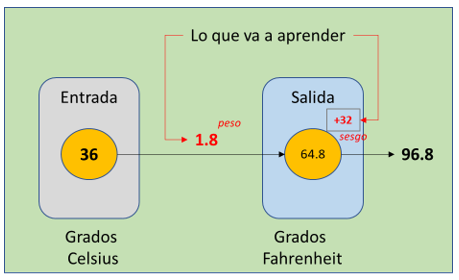

In [109]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) #capa DENSA de 1 neuronas y le entra informacion de 1 capa 
modelo = tf.keras.Sequential([capa]) #Modelo de 2 Capas [Informacion + Capa 1]

### Compilacion Red Neuronal

1. Usaremos el optimizador ADAM, hay otros más complejos como RELU, SOFTMAX...etc...es quien le dice a la red como ajustar los pesos y los sesgos (le dice como aprender y no desaprender)
2. Definiremos una tasa de aprendizaje de 0.1 (entre más pequeño el número el ajuste es menor y más tiempo dura en aprender).
3. Tomaremos la una función de calculo de perdida del aprendizaje llamada "MEAN_SQUARED_ERROR- error cuadradico medio", que es "una poca cantidad de error grandes es PEOR que una gran cantidad de errores pequeños"

In [110]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), # grado de finicion o precision que se espera de los resultados de esta red neuronal
    loss='mean_squared_error'
)

### Entrenamiento Red Neuronal

In [111]:
print("Comenzando entrenamiento...")
#historial = entrenamiento de modelo ( llegar de valor A , a valor B, numero de intentos, mostrar entrenamiento)
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False) #True es para mostrar el entrenamiento, False no lo muestra por consola
print("Modelo entrenado!")


Comenzando entrenamiento...
Modelo entrenado!


### Resultados de Entrenar la red Neronal

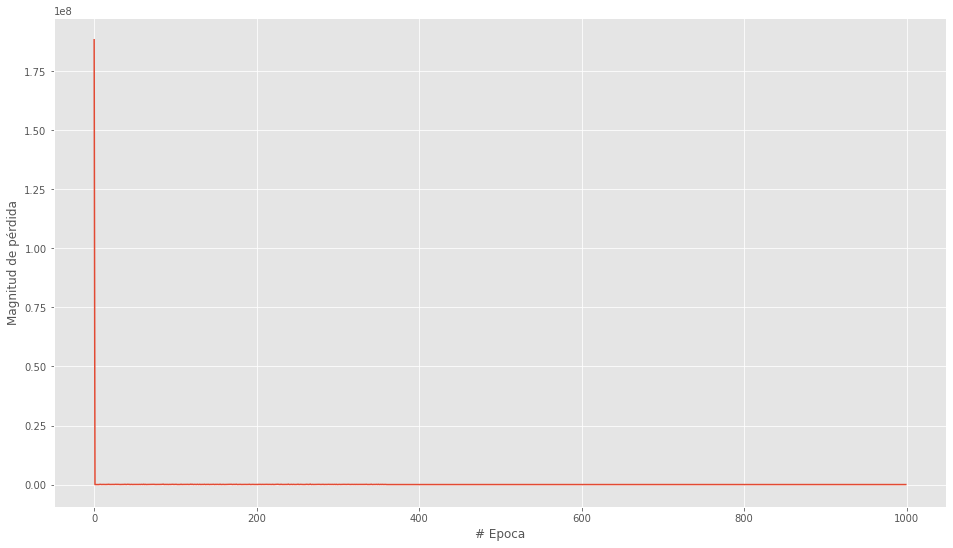

In [112]:
#Grafico de Codo el cual nos dira en que numero de vez que entreno llego a el nivel de prediccion exigido
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

### Probando predicciones

In [113]:
v_celsius = 40

print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_celsius]) # le mando el dato a convertir a el modelo para prediccion
result_real= f_conv_cels_fah(v_celsius) # le mando el mismo dato pero a la funcion regular
dif = 100-(resul_IA*100/result_real) # diferencia entre los datos

print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  40 ° = Fahrenheit: 
IA:  [[104.]] 
Regular:  104.0 
Dif %: [[0.]]


### Sesgos y pesos de los resultados

In [114]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1])

Variables internas del modelo
peso:  [[1.8]]
sesgo:  [32.]


## RED Celcius to Fahrenheit ve2

En esta ocacion utilizaremos mas neuronas y mas capas, observando como se comporta la red neuronal

In [115]:
# Creando Red Neuronal
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # capa DENSA con 3 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=3)                   # capa DENSA con 3 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

In [116]:
# compilamos
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [117]:
#entrenamos
print("Comenzando entrenamiento...")
historial_v2 = modelo_v2.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("modelo_v2 entrenado!")

Comenzando entrenamiento...
modelo_v2 entrenado!


## AAAAAAAAAA

In [ ]:
# Resultados del entrenamiento

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_v2.history["loss"])

Una vez termina el proceso de entrenamiento de las neuronas quedan, estas quedan con pesos y sesgos.

In [ ]:
# Conociendo sesgos y pesos resultantes
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

In [ ]:
# Prediccion

v_celsius = 40

print("Hagamos una predicción de Celsius a Fahrenheit!")
resul_IA   = modelo_v2.predict([v_celsius]) # le mando el dato a convertir a el modelo para prediccion
result_real= f_conv_cels_fah(v_celsius) # le mando el mismo dato pero a la funcion regular
dif = 100-(resul_IA*100/result_real) # diferencia entre los datos

print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

## RED Celcius-Kelvin

In [ ]:
#Crear red neuronal
capa_3 = tf.keras.layers.Dense(units=1, input_shape=[1]) #capa DENSA de 1 neuronas y le entra informacion de 1 capa 
modelo_v3 = tf.keras.Sequential([capa_3]) #Modelo de 2 Capas [Informacion + Capa 1]

# compilamos
modelo_v3.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

#entrenamos
print("Comenzando entrenamiento...")
historial_v3 = modelo_v3.fit(celsius, kelvin, epochs=500, verbose=False)
print("modelo_v2 entrenado!")

In [ ]:
# Resultados del entrenamiento

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_v3.history["loss"])

In [ ]:
# Conociendo sesgos y pesos resultantes
print("Variables internas del modelo")
print(capa_3.get_weights())

In [ ]:
# Prediccion

v_celsius = 40

print("Hagamos una predicción de Celsius a Fahrenheit!")
resul_IA   = modelo_v3.predict([v_celsius]) # le mando el dato a convertir a el modelo para prediccion
result_real= f_conv_cels_kel(v_celsius) # le mando el mismo dato pero a la funcion regular
dif = 100-(resul_IA*100/result_real) # diferencia entre los datos

print('Celsius= ',v_celsius, '° = Kelvin:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

## RED Fahrenheit to celcius

In [ ]:
#Crear red neuronal
capa_4 = tf.keras.layers.Dense(units=1, input_shape=[1]) #capa DENSA de 1 neuronas y le entra informacion de 1 capa 
modelo_v4 = tf.keras.Sequential([capa_4]) #Modelo de 2 Capas [Informacion + Capa 1]

# compilamos
modelo_v4.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

#entrenamos
print("Comenzando entrenamiento...")
historial_v4 = modelo_v4.fit(fahrenheit, celsius, epochs=500, verbose=False)
print("modelo_v4 entrenado!")

In [ ]:
# Resultados del entrenamiento

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_v4.history["loss"])

In [ ]:
# Conociendo sesgos y pesos resultantes
print("Variables internas del modelo")
print(capa_4.get_weights())

In [ ]:
# Prediccion

v_celsius = 40

print("Hagamos una predicción de Celsius a Fahrenheit!")
resul_IA   = modelo_v4.predict([v_celsius]) # le mando el dato a convertir a el modelo para prediccion
result_real= f_conv_fah_cels(v_celsius) # le mando el mismo dato pero a la funcion regular
dif = 100-(resul_IA*100/result_real) # diferencia entre los datos

print('Fahrenheit= ',v_celsius, '° = Celcius:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

## RED Fahrenheit to Kelvin

In [ ]:
#Crear red neuronal
capa_5 = tf.keras.layers.Dense(units=1, input_shape=[1]) #capa DENSA de 1 neuronas y le entra informacion de 1 capa 
modelo_v5 = tf.keras.Sequential([capa_5]) #Modelo de 2 Capas [Informacion + Capa 1]

# compilamos
modelo_v5.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

#entrenamos
print("Comenzando entrenamiento...")
historial_v5 = modelo_v5.fit(fahrenheit, kelvin, epochs=500, verbose=False)
print("modelo_v5 entrenado!")

In [ ]:
# Resultados del entrenamiento

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_v5.history["loss"])

In [ ]:
# Conociendo sesgos y pesos resultantes
print("Variables internas del modelo")
print(capa_5.get_weights())

In [ ]:
# Prediccion

v_celsius = 40

print("Hagamos una predicción de Celsius a Fahrenheit!")
resul_IA   = modelo_v5.predict([v_celsius]) # le mando el dato a convertir a el modelo para prediccion
result_real= f_conv_fah_kel(v_celsius) # le mando el mismo dato pero a la funcion regular
dif = 100-(resul_IA*100/result_real) # diferencia entre los datos

print('Fahrenheit= ',v_celsius, '° = Kelvin:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

## RED Kelvin to Celcius

In [ ]:
#Crear red neuronal
capa_6 = tf.keras.layers.Dense(units=1, input_shape=[1]) #capa DENSA de 1 neuronas y le entra informacion de 1 capa 
modelo_v6= tf.keras.Sequential([capa_6]) #Modelo de 2 Capas [Informacion + Capa 1]

# compilamos
modelo_v6.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

#entrenamos
print("Comenzando entrenamiento...")
historial_v6 = modelo_v6.fit(kelvin, celsius, epochs=500, verbose=False)
print("modelo_v2 entrenado!")

In [ ]:
# Resultados del entrenamiento

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_v6.history["loss"])

In [ ]:
# Conociendo sesgos y pesos resultantes
print("Variables internas del modelo")
print(capa_6.get_weights())

In [ ]:
# Prediccion

v_celsius = 40

print("Hagamos una predicción de Celsius a Fahrenheit!")
resul_IA   = modelo_v6.predict([v_celsius]) # le mando el dato a convertir a el modelo para prediccion
result_real= f_conv_kel_cels(v_celsius) # le mando el mismo dato pero a la funcion regular
dif = 100-(resul_IA*100/result_real) # diferencia entre los datos

print('Kelvin= ',v_celsius, '° = Celsius:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

## RED Kelvin to Fahrenheit

In [ ]:
#Crear red neuronal
capa_7 = tf.keras.layers.Dense(units=1, input_shape=[1]) #capa DENSA de 1 neuronas y le entra informacion de 1 capa 
modelo_v7 = tf.keras.Sequential([capa_7]) #Modelo de 2 Capas [Informacion + Capa 1]

# compilamos
modelo_v7.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

#entrenamos
print("Comenzando entrenamiento...")
historial_v7 = modelo_v7.fit(kelvin, fahrenheit, epochs=500, verbose=False)
print("modelo_v2 entrenado!")

In [ ]:
# Resultados del entrenamiento

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_v7.history["loss"])

In [ ]:
# Conociendo sesgos y pesos resultantes
print("Variables internas del modelo")
print(capa_7.get_weights())

In [ ]:
# Prediccion

v_celsius = 40

print("Hagamos una predicción de Celsius a Fahrenheit!")
resul_IA   = modelo_v7.predict([v_celsius]) # le mando el dato a convertir a el modelo para prediccion
result_real= f_conv_kel_fah(v_celsius) # le mando el mismo dato pero a la funcion regular
dif = 100-(resul_IA*100/result_real) # diferencia entre los datos

print('Kelvin= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

## Conclusiones:

El uso de redes neuronales es aplicable en casí cualquier problema que requiera clasificación o predicción

Al usar capas ocultas:

1. El aprendizaje se realiza en menor cantida de EPOCS/CICLOS y configurando algunos Hyper-parametros el modelo se vuelve más eficiente
2. La signación de pesos y sesgos se vuelve más complejo de analizar
3. La cantidad de capas y neuronas NO se hace de forma aleatoria, se hace usando una formula de compensación (la veremos despues).